- #### Load the necessary Libraries

In [1]:
import fastf1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import fastf1.plotting as f1plt

- #### Create a path for cached data, so that it doesn't constantly re-download the same files

In [2]:
my_path = r'C:\Users\apost\miniconda3\envs\fastF1_cache'
fastf1.Cache.enable_cache(my_path)

- #### Load the 2023 race data
- ##### We're starting with the first 2023 race, Bahrain, using our custom loading function

In [3]:
from fastf1_helper import get_race
bhr_2023 = get_race(2023, 1)
bhr_2023.load()

core           INFO 	Loading data for Bahrain Grand Prix - Race [v3.6.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '11', '14', '55', '44', '18', '63', '77', '10', '23', '22', '2', '20', '21', '27', '24', '4', '31', '16', '81']


In [4]:
for stat in dir(bhr_2023):
    print(str(stat), end = " || ")

_QUALI_LIKE_SESSIONS || _RACE_LIKE_SESSIONS || _Session__fix_tyre_info || __class__ || __delattr__ || __dict__ || __dir__ || __doc__ || __eq__ || __format__ || __ge__ || __getattribute__ || __getstate__ || __gt__ || __hash__ || __init__ || __init_subclass__ || __le__ || __lt__ || __module__ || __ne__ || __new__ || __reduce__ || __reduce_ex__ || __repr__ || __setattr__ || __sizeof__ || __str__ || __subclasshook__ || __weakref__ || _add_first_lap_time_from_ergast || _add_track_status_to_laps || _calculate_quali_like_session_results || _calculate_race_like_session_results || _calculate_t0_date || _car_data || _check_lap_accuracy || _drivers_from_f1_api || _drivers_results_from_ergast || _ergast || _fix_missing_laps_retired_on_track || _get_property_warn_not_loaded || _laps || _load_drivers_results || _load_laps_data || _load_race_control_messages || _load_session_info || _load_session_status_data || _load_telemetry || _load_total_lap_count || _load_track_status_data || _load_weather_data 

In [5]:
laps_bhr2023 = bhr_2023.laps
results_bhr2023 = bhr_2023.results
weather_bhr2023 = bhr_2023.weather_data

# Add a name attribute to the laps dataframe, to be used in plotting
laps_bhr2023.attrs['name'] = '2023 Bahrain Grand Prix Laps'
results_bhr2023.attrs['name'] = '2023 Bahrain Grand Prix Final Standings'

In [6]:
# Add fastf1 specific plt styles
f1plt.setup_mpl()

- #### Print the driver names

In [7]:
laps_bhr2023.loc[:, ['Driver', 'Team']].drop_duplicates().sort_values(by = 'Team')

,Driver,Team
986,BOT,Alfa Romeo
607,ZHO,Alfa Romeo
493,TSU,AlphaTauri
437,DEV,AlphaTauri
57,GAS,Alpine
719,OCO,Alpine
171,ALO,Aston Martin
268,STR,Aston Martin
872,SAI,Ferrari
228,LEC,Ferrari


- #### Create a list of the drivers' names to use later

In [8]:
drivers_list = list(laps_bhr2023['Driver'].unique())

- #### Load the custom function to plot Lap Times for each driver

In [9]:
from fastf1_helper import plot_lap_times

- #### Compare lap times between a bunch of Teammates

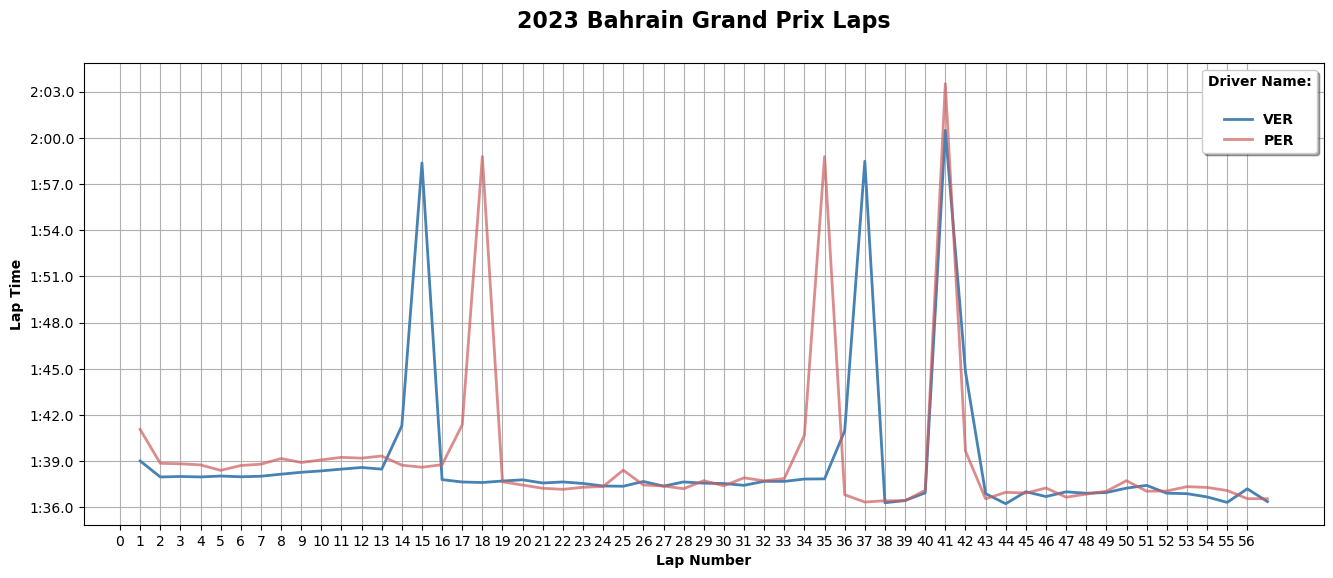

In [10]:
fig, ax_ex = plt.subplots(figsize = (16, 6))
plot_lap_times('VER', laps_bhr2023, ax_ex)
plot_lap_times('PER', laps_bhr2023, ax_ex, color = 'indianred', alpha = 0.7)
plt.grid()
plt.show()

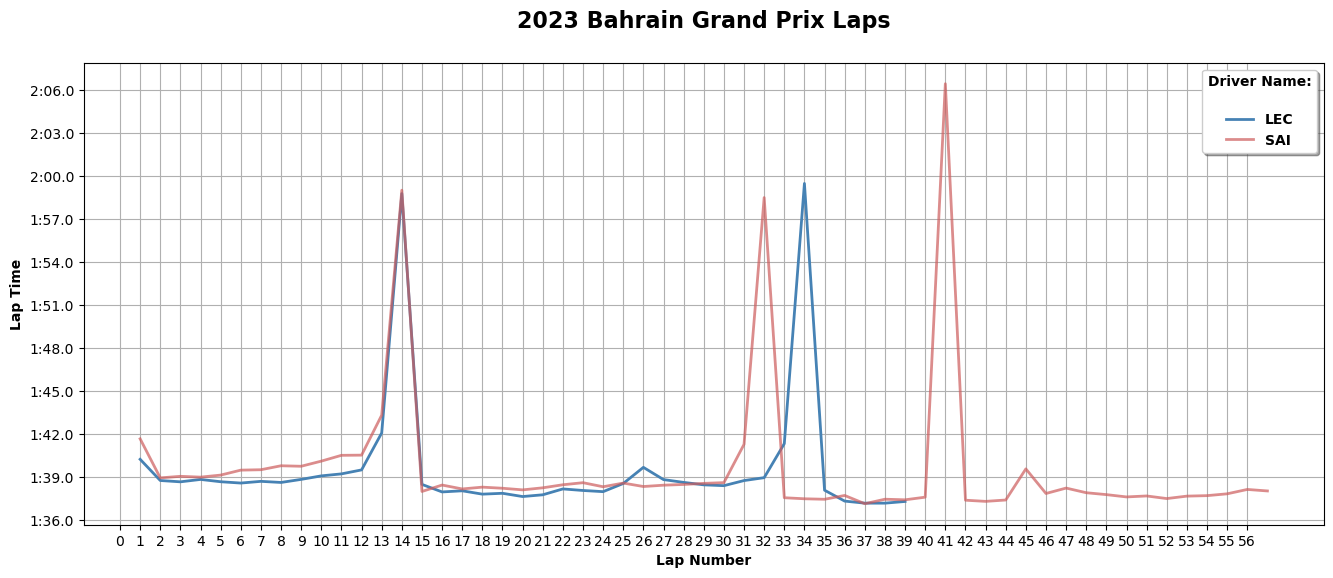

In [11]:
fig, ax_ex2 = plt.subplots(figsize = (16, 6))
plot_lap_times('LEC', laps_bhr2023, ax_ex2)
plot_lap_times('SAI', laps_bhr2023, ax_ex2, color = 'indianred', alpha = 0.7)
plt.grid()
plt.show()

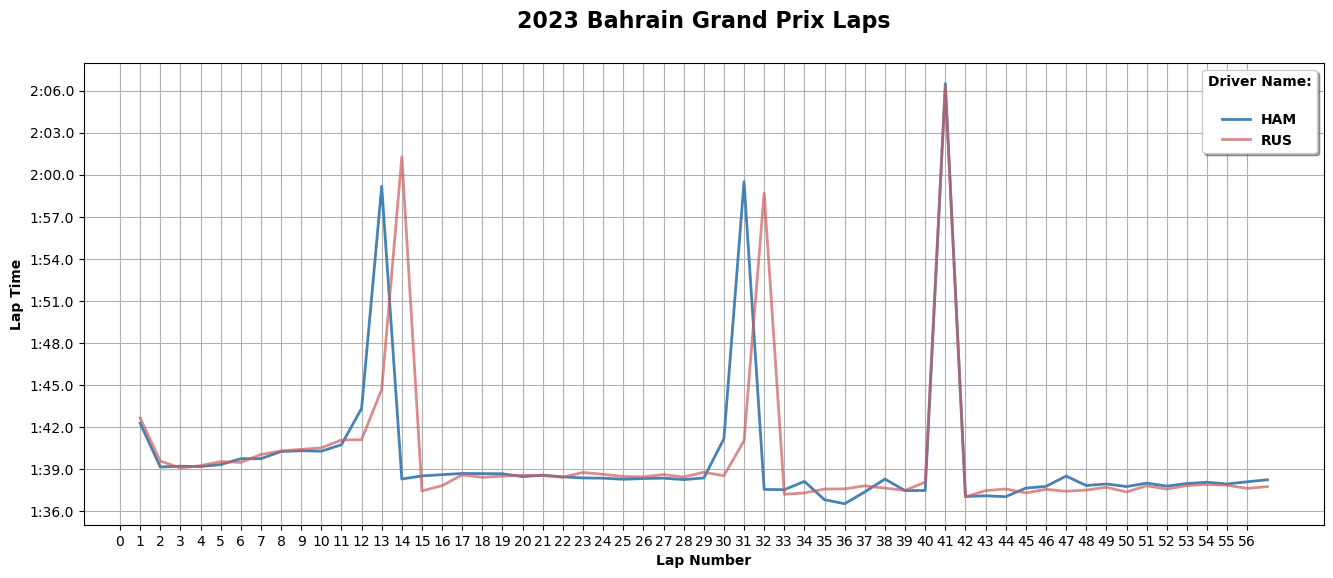

In [12]:
fig, ax_ex3 = plt.subplots(figsize = (16, 6))
plot_lap_times('HAM', laps_bhr2023, ax_ex3)
plot_lap_times('RUS', laps_bhr2023, ax_ex3, color = 'indianred', alpha = 0.7)
plt.grid()
plt.show()

- #### Function to plot the final results of a race

In [13]:
from fastf1_helper import get_final_results

req            INFO 	Using cached data for driver_info


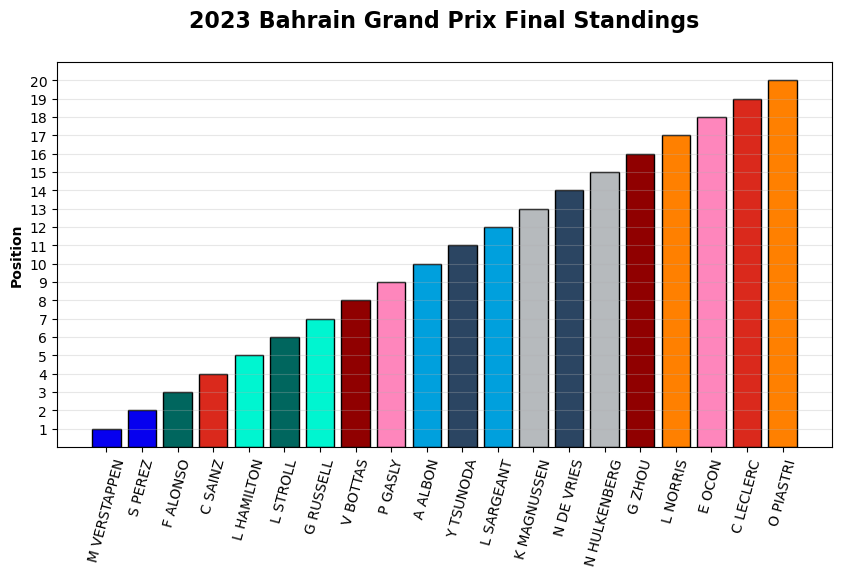

In [14]:
fig, ax_ex4 = plt.subplots(figsize = (10, 5))
get_final_results(results_bhr2023, bhr_2023, ax = ax_ex4)
plt.show()

In [15]:
laps_bhr2023.columns

Index(['Time', 'Driver', 'DriverNumber', 'LapTime', 'LapNumber', 'Stint',
       'PitOutTime', 'PitInTime', 'Sector1Time', 'Sector2Time', 'Sector3Time',
       'Sector1SessionTime', 'Sector2SessionTime', 'Sector3SessionTime',
       'SpeedI1', 'SpeedI2', 'SpeedFL', 'SpeedST', 'IsPersonalBest',
       'Compound', 'TyreLife', 'FreshTyre', 'Team', 'LapStartTime',
       'LapStartDate', 'TrackStatus', 'Position', 'Deleted', 'DeletedReason',
       'FastF1Generated', 'IsAccurate'],
      dtype='object')

In [16]:
stats_bhr2023 = laps_bhr2023.groupby('Driver').agg(
    avgLapTime = ('LapTime', 'mean'),
    stdLapTime = ('LapTime', 'std'),
    lapsCompleted = ('LapNumber', 'max')
).reset_index()

In [17]:
stats_bhr2023['avgLapTime_s'] = stats_bhr2023['avgLapTime'].dt.total_seconds()
stats_bhr2023['stdLapTime_s'] = stats_bhr2023['stdLapTime'].dt.total_seconds()
stats_bhr2023 = stats_bhr2023.drop(['avgLapTime', 'stdLapTime'], axis = 1)

In [18]:
stats_bhr2023 = stats_bhr2023.merge(
    # We have to rename the 'Abbreviation' column, because in our dataframe it's called 'Driver'
    results_bhr2023[['Abbreviation', 'GridPosition', 'Position']].rename(columns = {'Abbreviation': 'Driver'}),
    how = 'left',
    on = 'Driver'
)